In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Description of Data Set

I am going to analyze on the Youtube trending videos of 2 months (Sep,Oct) in 2017 dataset derived from Kaggle (https://www.kaggle.com/datasnaek/youtube). 
First reading both USvideos.csv and UScomments.csv. There are few bad lines in the data set which is getting ignored with error_bad_lines flag.

In [37]:
df_videos = pd.read_csv('./datasets/youtube/USvideos.csv',error_bad_lines=False)
df_comments = pd.read_csv('./datasets/youtube/UScomments.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/sujittripathy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### Q1. Find the top 10 channels trending videos tagged under iPhone based on their views. The goal is to find which channel is the best in the iPhone trending data set.

Searching DataFrame 'tags' columns which is tagged either iPhone or Apple, followed by sorting in Descending to get largest to smallest, followed by limiting to top10.
Once the DataFrame is filtered and sorted, then plotting the same by using 'plot' method of DataFrame as a bar chart with a 'y-axis' range from 1 m to 20m range.

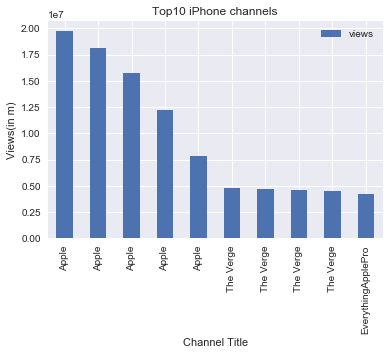

In [4]:
df_videos_top = df_videos[df_videos['tags'].str.contains('iPhone' or 'Apple')].sort_values(by='views', ascending=False).head(10)
ax = df_videos_top.plot(kind='bar',x='channel_title',y='views',title='Top10 iPhone channels')
ax.set_xlabel('Channel Title')
ax.set_ylabel('Views(in m)')

### Q2. Find a relation between the category id and how many videos getting uploaded on that category. The goal is what is the category of highest trending videos. 
Below is the mapping of category name and mapping to their numeric id.
https://gist.github.com/sujittripathy/29488b1dc9abd75bd79e62c0b3756203


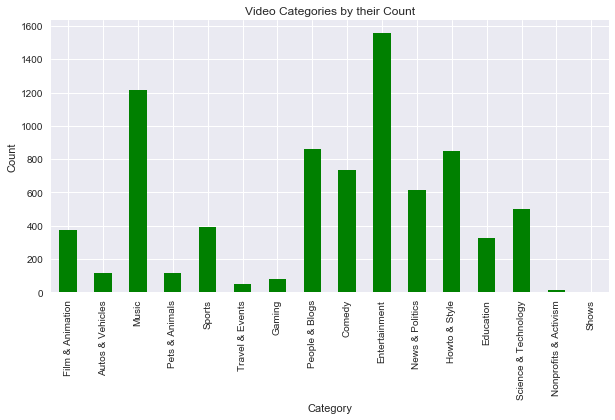

In [5]:
cat_id_mapping = {2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports',
                 19:'Travel & Events',20:'Gaming',22:'People & Blogs',
                 23:'Comedy',24:'Entertainment',25:'News & Politics',
                 26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'}
df_videos_gb = df_videos.groupby('category_id').count()['title']
df_videos_gb = df_videos_gb.rename(cat_id_mapping)
ax = df_videos_gb.plot(kind='bar',title='Video Categories by their Count',color='green',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')


### Q3. Create a single chart by showing the trending video like & dislike relation to their views & commen. 

This plot shows the dislike videos are less viewed compare to the like video. # of Comments and views are more on more liking videos compare to dislike videos are less viewed.

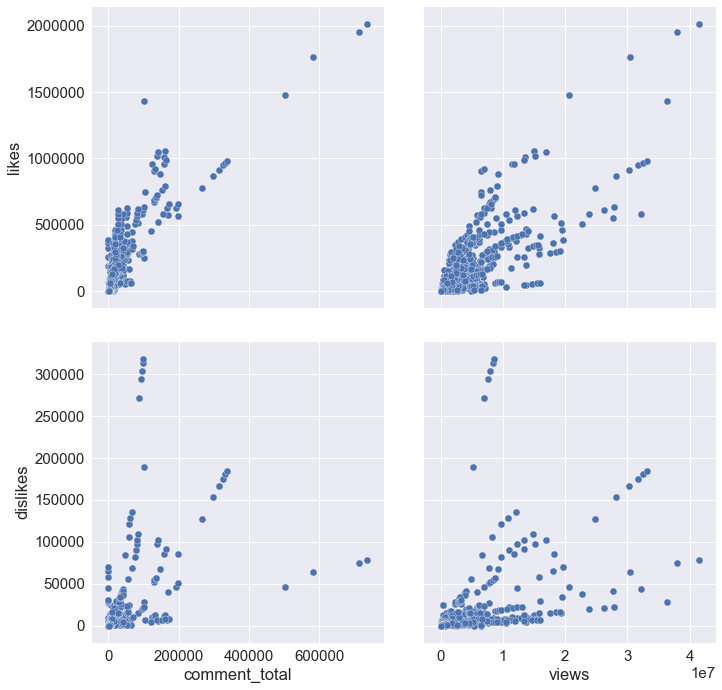

In [130]:
sns.pairplot(df_videos,x_vars=['comment_total','views'],y_vars=['likes','dislikes'],size=5)

### Q4. The goal is to find the trending videos 'views' with their 'likes' ratio. Is there any relation exists?

The below plot is a Seaborn jointplot which takes views in X-axis and likes in Y-axis and draws a regression line. The conclusion from the plot is that the likes of the video depends on their number of viewing. The view which has 2M likes has been watched over 40M.

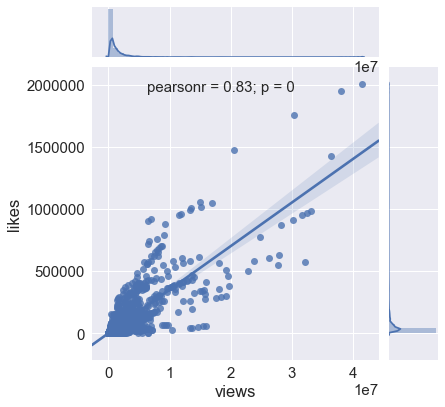

In [110]:
sns.jointplot(x='views',y='likes',data=df_videos,kind='reg')

### Q5. What are the top 20 trending video titles based on their  number of comments

To achive this we need to join two data sets which are videos and comments by using video id column, which is common in both the data set. The graph is using seaborn barplot where X-axis is Title and Y-axis is the total comments count.

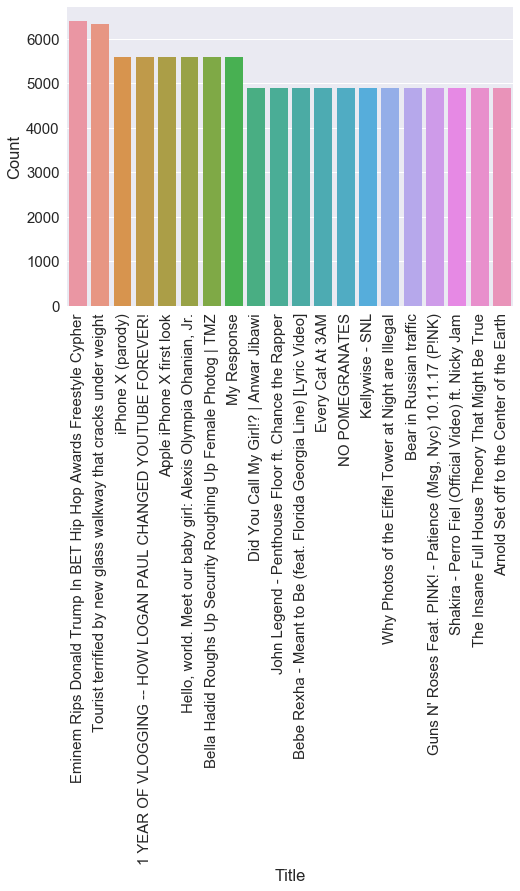

In [95]:
df_combined = pd.merge(df_videos,df_comments,on='video_id')
df_combined = df_combined.groupby('title').count().sort_values(by='comment_text',ascending=False).head(20)
sns.set(font_scale=1.5)
ax = sns.barplot(x=df_combined.index,y='comment_text',data=df_combined)
ax.set_xticklabels(labels=df_combined.index,rotation=90)
ax.set_xlabel('Title')
ax.set_ylabel('Count')

### Further Research
These plots I have derived from my initial learning on Matplotlib and Seaborn. As I study further will derive further insight on the data and corelate the same via visualization.